In [4]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

# 1. 신경망

In [5]:
# 신경망 알고리즘은 딥러닝(deep learning)으로 분류됨
# 딥러닝이 많은 머신러닝 애플리케이션에서 매우 희망적인 성과를 보여주고 있지만,
# 특정 분야에 정교하게 적용되어 있을 때가 많다.
# 다층 퍼셉트론(multilayer perceptrons, MLP)을 다룸
# 다층 퍼셉트론 = 피드포워드(feed-forward) 신경망 = 신경망 = 완전 연결 신경망(fully
# connected neural networks, 입력, 출력, 은닉층의 유닛들이 모두 연결됐다는 뜻)

# 2. 신경망 모델

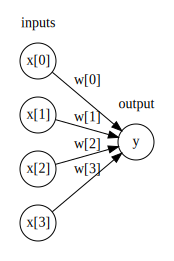

In [6]:
# MLP는 여러 단계를 거쳐 결정을 만들어내느 선형 모델의 일반화된 모습으로 볼 수 있다.
# 선형 회귀 모델 공식
# y^ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

# 로지스틱 회귀 그림으로 나타내기
display(mglearn.plots.plot_logistic_regression_graph())
# 왼쪽 노드: 입력 특성
# 연결선: 학습된 계수
# 오른쪽 노드: 입력의 가중치 합, 즉 출력

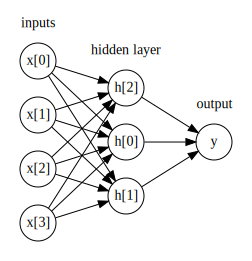

In [7]:
# MLP에서는 가중치 합을 만드는 과정이 여러 번 반복되며,
# 먼저 중간 단계를 구성하는 은닉 유닛(hidden unit)을 계산하고
# 이를 이용하여 최종 결과를 산출하기 위해 다시 가중치 합 계산

# 은닉층이 하나인 다층 퍼셉트론
display(mglearn.plots.plot_single_hidden_layer_graph())

# 이런 모델은 많은 계수(가중치)를 학습해야 한다.
# 여러 개의 가중치 합 계산 = 하나의 가중치 합 계산이어서, 이 모델을 선형 모델보다
# 강력하게 만들려면 또 다른 기교가 필요하다.
# 각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수 렐루(rectified linear unit
# , ReLU)나 하이퍼볼릭 탄젠트(hyperbolic tangent, tanh)를 적용한다. (이런 함수들을
# 활성화 함수(activation function)라 하며 시그모이(sigmoid) 함수(로지스틱 함수로도
# 불림, 수식은 1/(1+e^-z), z는 유닛의 출력값)도 있다.)
# 이 함수 결과의 가중치 합을 계산하여 출력 y^을 만든다.

Text(0,0.5,'relu(x), tanh(x)')

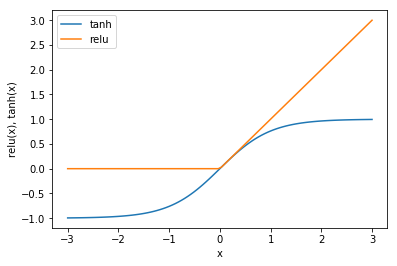

In [8]:
# 렐루 활성화 함수, 하이퍼볼릭 탄젠트 활성화 함수
# 렐루 함수는 0이하 잘라버림
# tanh 함수는 낮은 입력값에 대해서는 -1로 수렴, 큰 입력에 대해서는 +1로 수렴
# 이런 비선형 함수를 이용해 신경망이 선형 모델에서보다 훨씬 더 복잡한 함수 학습 가능

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

# 은닉층이 하나인 다층 퍼셉트론 그림에 tanh 비선형 함수를 사용해서 회귀 분석 할 때,
# y^ 공식
# h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0])
# h[1] = tanh(w[0, 1] * x[0] + w[1, 1] * x[1] + w[2, 1] * x[2] + w[3, 1] * x[3] + b[1])
# h[2] = tanh(w[0, 2] * x[0] + w[1, 2] * x[1] + w[2, 2] * x[2] + w[3, 2] * x[3] + b[2])
# y^ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b

# w: 입력 x와 은닉층 h 사이의 가중치
# v: 은닉층 h와 출력 y^ 사이의 가중치
# 가중치 v, w는 training data에서 학습

# 우리가 정해야 하는 중요한 매개변수는 은닉층의 유닛 개수
# 소규모 데이터셋일 경우 10개 정도도 괜찮지만
# 매우 복잡한 데이터셋에서는 10,000개가 될 수도 있다.

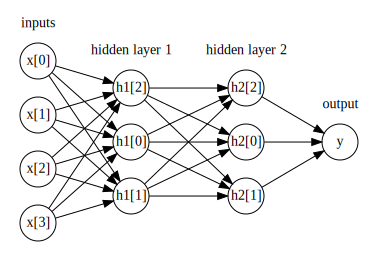

In [9]:
# 은닉층 추가한 다층 퍼셉트론
mglearn.plots.plot_two_hidden_layer_graph()

# 3. 신경망 튜닝

Text(0,0.5,'feature 1')

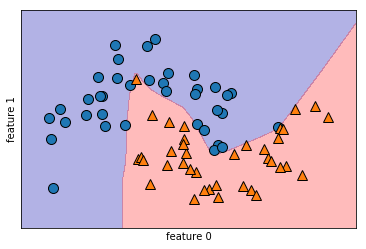

In [10]:
# two_moons 데이터셋에 분류를 위한 다층 퍼셉트론(MLP) 구현

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

# 이 신경망은 매우 비선형적이지만 비교적 매끄러운 결정 경계를 만듬

Text(0,0.5,'feature 1')

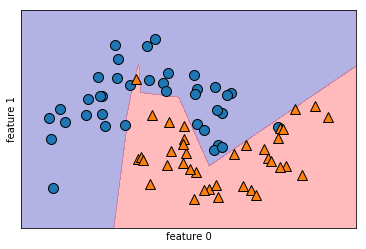

In [11]:
# MLP 기본값으로 은닉 유닛 100개 사용
# 이런 작은 데이터셋에는 과분한 크기
# 은닉 유닛 개수를 줄여도(모델의 복잡도는 낮아짐) 좋은 결과를 얻을 수 있다.

# 은닉 유닛 개수를 줄인 모델
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

# 은닉 유닛이 10개여서 결정 경계가 조금 더 날카로워짐
# 기본 비선형 함수는 렐루
# 은닉층이 하나이므로 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 구성된다.
# 더 매끄러운 결정 경계를 위한 방법(복잡도 제어 방법)
# 1) 은닉 유닛 추가 
# 2) 은닉층 추가
# 3) tanh 함수 사용
# 4) 드롭아웃(dropout): 신경망에서 사용하는 대표적인 규제방법
#  - 은닉층 유닛의 일부를 랜덤하게 작동시키지 않음으로써 마치 서로 다른 많은 신경망을
#    앙상블시키는 것 같은 효과를 내어 과대적합을 방지한다.
#  - scikit-learn에서 아직 드롭아웃 지원 안함

Text(0,0.5,'feature 1')

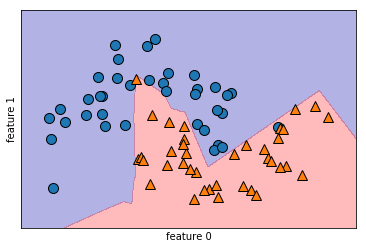

In [12]:
#  10개의 유닛으로 된 2개의 은닉층과 렐루 활성화 함수로 만든 결정 경계

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0,0.5,'feature 1')

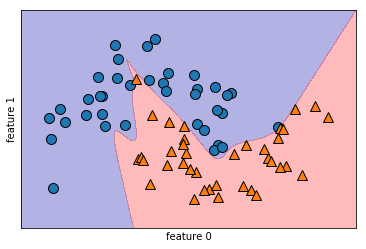

In [13]:
# 10개의 유닛으로 된 2개의 은닉층과 tanh 활성화 함수로 만든 결정 경계

mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

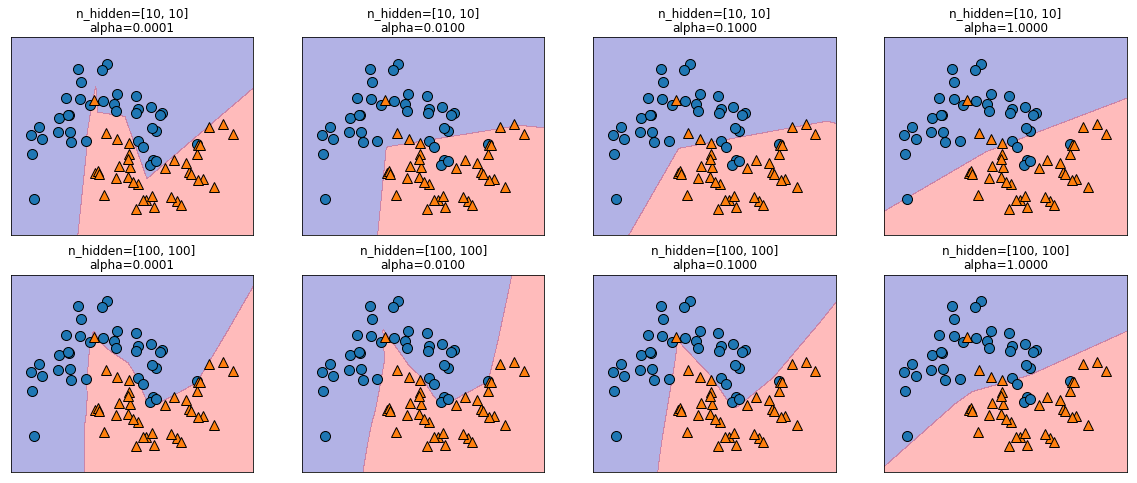

In [14]:
# L2 페널티를 사용해 가중치를 0에 가깝게 감소시켜 복잡도를 제어할 수 있다.
# alpha 매개변수 이용
# 기본값은 매우 낮게 되어 있다.(거의 규제하지 않게)

# two_moons 데이터셋에 유닛 각각 10개와 100개, 은닉층 2개에 따라 alpha값이 미치는 영향

fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=
                           [n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes,
                                            n_hidden_nodes, alpha))
        
# 신경망에서는 학습 시작 전 가중치를 랜덤 설정하며, 이 랜덤한 초기화가 모델의 학습에
# 영향을 준다.
# 따라서 같은 매개변수를 사용하더라도 초깃값이 다르면 모델이 많이 달라질 수 있다.
# 신경망이 크고 복잡도도 적절하면 이런 점이 정확도에 미치는 영향은 크지 않지만
# 항상 기억하고는 있어야 한다.(특히 작은 신경망일 경우엔)

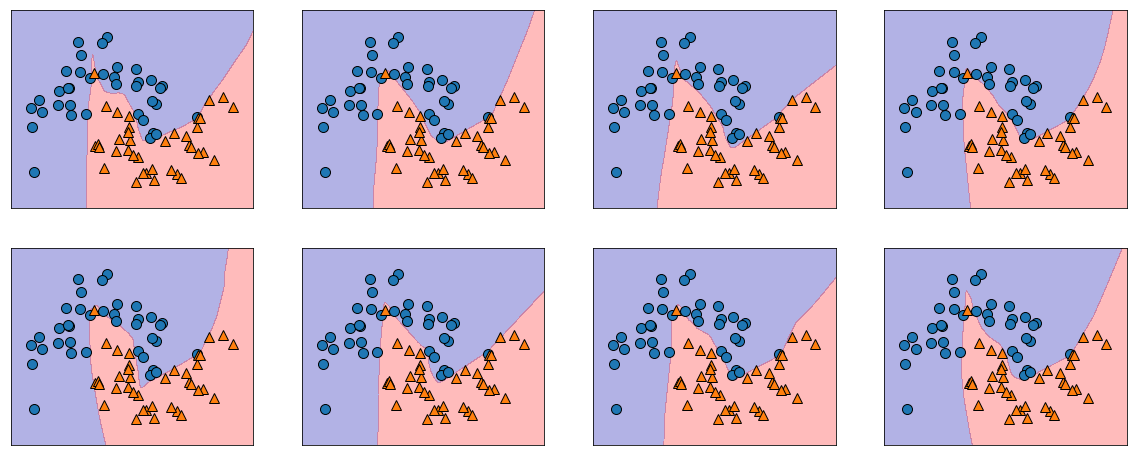

In [15]:
# 같은 매개변수, 다른 초기값 모델들

fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [16]:
# 유방암 데이터셋에 신경망 적용
# 매개변수는 기본값

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("유방암 데이터의 특성별 최대값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("training set 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("test set 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

# 정확도는 꽤 좋지만 다른 모델만큼은 아님
# SVC와 비슷하게 신경망도 모든 입력 특성을 평균 0, 분산 1이 되도록 변형하는 것이 좋다.

# * z-점수(z-score) 또는 표준 점수(standard score): 데이터에서 평균을 빼고 표준편차로
#   나눈 값
# * z-score는 평균 0, 분산 1인 표준정규분포이다.

training set 정확도: 0.91
test set 정확도: 0.88


In [26]:
# z-score로 스케일을 맞춘 MLP

# training set의 각 특성별 평균
mean_on_train = X_train.mean(axis=0)
# training set의 각 특성별 표준편차
std_on_train = X_train.std(axis=0)
# 데이터에서 평균을 빼고 표준편차로 나누면 평균 0, 표준편차 1인 데이터로 변환된다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (raining data의 평균, 표준편차로 test set 데이터 변환
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("training set 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set 정확도:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

# 스케일을 조정해서 결과가 좋아서 다른 모델의 성능 못지 않다.
# 최대반복 횟수에 도달했다는 경고가 뜨면 반복 횟수를 늘려야 한다.

# Stochastic Optimizer Error
# Adam(Adaptive Moment Estimation) 알고리즘: 경사 하강법의 학습률(learning rate)
#                                            매개변수를 학습이 반복됨에 따라 조정한다.
# MLPClassifier, MLPRegressor의 solver 매개변수 기본값: adam
# max_iter 매개변수 기본값: 200

training set 정확도: 0.991
test set 정확도:0.965


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [28]:
# 최대 반복 횟수를 늘린 모델

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("training set 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set 정확도:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

# 반복 횟수를 늘려 모델의 성능이 매우 좋아졌지만 일반화 성능을 더 올려 모델의 
# 복잡도를 낮출 수 있다.

training set 정확도: 0.993
test set 정확도:0.972


In [30]:
# 가중치를 더 강하게 규제하도록 alpha 매개변수 증가(0.0001 → 1 아주 크게)

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("training set 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set 정확도:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

# 가장 좋은 모델의 성능과 동일
# 여러 모델이 0.972의 동일한 정확도를 보여줌
# 이는 모든 모델이 똑같은 개수 즉 4개를 실수한다는 뜻
# 실제 예측한 걸보면 정확히 동일한 포인트 잘못 분류

# 신경망은 선형 모델이나 트리 모델보다 훨씬 까다롭다.
# 모델의 가중치를 확인해보면 무엇이 학습됐는지 알 수 있다.
# http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html

training set 정확도: 0.988
test set 정확도:0.972


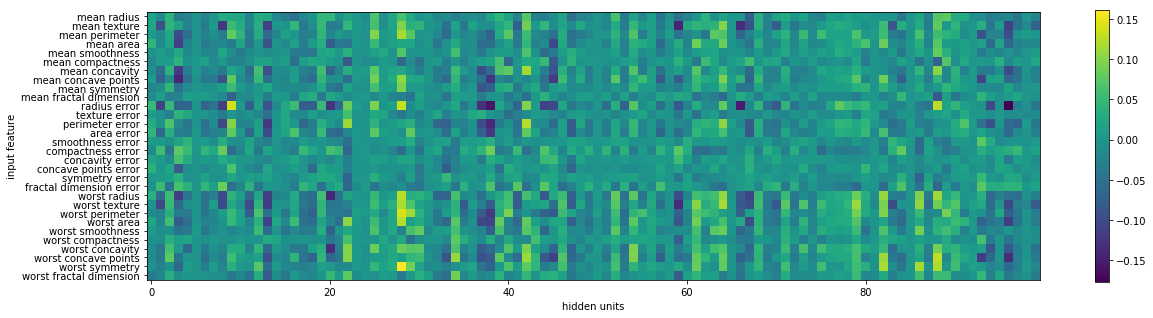

In [36]:
# 유방암 데이터셋에 MLP 적용
# 입력과 은닉층 사이의 학습된 가중치
# 밝은 색: 큰 양수, 어두운 색: 음수

# * mlp.coef_[0]: 입력과 은닉층 사이의 가중치가 저장된 (30, 100) 크기의 Numpy 배열
#   mlp.coef_[1]: 은닉층과 출력 사이의 가중치가 저장된 (100, 1) 크기의 Numpy 배열

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden units")
plt.ylabel("input feature")
plt.colorbar()

# 모든 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하다
# smoothness error와 fractal dimension erro 사이에 있는 특성들, mean smoothness, 
# mean compactness 특성이 다른 특성들보다 가중치가 낮다.
# 이 특성들은 덜 중요하거나 신경망에게 적절하게 입력되지 않았을 수 있다.
# 이 특성들을 포함해 몇몇 특성들의 가중치는 0에 가까운 값을 가지고 있어 너무 밝거나
# 너무 어둡지 않은 밋밋한 색깔로 히트맵의 가로줄을 만드는 것 같은 느낌을 줌

# 은닉층과 출력층 사이의 가중치도 시각화 가능, 하지만 해석하긴 어렵다.

# MLPClassifier, MLPRegressor는 일반적인 신경망 구조를 위한 손쉬운 인터페이스 제공
# 하지만 전체 신경망 종류의 일부만 만들 수 있다.
# 더 복잡하고 대규모인 모델을 만들려면 전문적인 딥러닝 라이브러리 사용해야 함
# keras, lasagna, tensorflow, PyTorch 등
# lasagna: theano 라이브러리 위에 구축한 것
# keras: tensorflow와 theano 중 선택 가능
# 이 라이브러리들은 신경망 만드는데 훨씬 유연한 인터페이스 제공
# 잘 알려진 딥러닝 라이브러리들은 모두 scikit-learn에서 지원하지 않는 고성능 그래픽
# 처리장치(GPU)를 사용할 수 있다.
# GPU를 사용하면 10~100배 빠르게 연산 할 수 있다.

# 4. 장단점과 매개변수

In [37]:
# 장점
# 신경망은 머신러닝 분야의 최고의 모델
# 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다.
# 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 다른 머신러닝 알고리즘을
# 뛰어넘는 성능 발휘

# 단점
# 종종 학습이 오래 걸림
# 데이터 전처리에 주의해야 한다. 
# SVM과 비슷하게 모든 특성이 같은 의미를 가진 동질의 데이터에서 잘 작동한다.
# 다른 종류의 특성을 가진 데이터에선 트리 기반 모델이 더 잘 작동할 수 있다.

# 5. 신경망의 복잡도 추정

In [ ]:
# 중요 매개변수: 은닝층 개수, 각 은닉층의 유닛 수
# 은닉층은 처음엔 한 개부터 시작해서 늘려가야 한다.
# 유닛 수는 보통 입력 특성 수와 비슷하게 설정하지만 수천 초중반을 넘는 일 거의 없음

# 복잡도에 대해 도움이 될만한 측정치: 학습된 가중치 또는 계수의 수
# ex) 특성 100개, 은닉 유닛 100개를 가진 이진 분류
#     입력층가 첫 번째 은닉층 사이 가중치
#     - 100 * 100 + 100 = 10,100개(+100은 입
#     - 100 * 1 + 1 = 101개 가중치
#     총 10,201개 가중치

#     은닉 유닛이 100개인 두 번째 은닉층 추가
#     첫 번째 은닉층에서 두 번째 은닉층 가중치
#     - 100 * 100 + 100 = 10,100개 가중치
#     총 20,301개 가중치

#     유닛 1,000개 은닉층 하나만 사용한다면
#     입력층과 은닉층 사이 가중치
#     - 100 * 1000 + 1000 = 101,000개
#     은닉층과 출력층 사이 가중치
#     - 1,000 * 1 + 1 = 1,001개
#     총 102,001개 가중치

#     두 번째 은닉층 추가 가중치
#     - 1,000 * 1,000 + 1,000 = 1,001,000개
#     총 1,103,001개 가중치

#     유닛 100개짜리 은닉층 2개 였을 때보다 50배 커짐

# 신경망의 매개변수 조정 방법
# 1) 충분히 과대적합되어서 문제를 해결할만한 큰 모델을 만든다.
# 2) 그런 다음 training data가 충분히 학습될 수 있다고 생각될 때 신경망 구조를 줄이거나
#    규제 강화를 위해 alpha값 증가시켜 일반화 선능 향상시킴

# 모델 구성 요소
# 층 개수, 층당 유닛 개수, 규제, 비선형성 등

# solver 매개변수값
# 1) adam(기본값)
#  - 대부분의 경우 기본값을 잘 작동하지만 데이터 스케일에 조금 민감(그래서 평균 0, 
#    분산 1 로 표준화하는게 중요)
# 2) lbfgs(Broyden-Fletcher-Goldfarb-Shanno, 연구자 이름)
#  - 안정적이지만 규모가 큰 모델, 대량의 데이터셋에서는 시간이 오래 걸림
#  - 의사 뉴턴 메서드(Newton Method) 중 하나
#  - L-BFGS(Limited-memory BFGS)는 BFGS 알고리즘을 제한된 메모리 공간에서 구현하는 방법
# 3) sgd
#  - 딥러닝 연구자가 사용하는 고급 옵션
#  - 다른 여러 매개변수와 함께 튜닝하여 최선의 결과를 만들 수 있다.
#  - sgd 옵션일 때 영향을 미치는 매개변수: momentum, nesterovs_momentum
#    * 모멘텀 방식
#     - 이전의 그래디언트를 momentum 매개변수 비율만큼 현재 계산된 그래디언트에 반영해
#       갱신할 그래디언트를 구한다.
#     - 이전의 그래디언트를 속도라고도 하며, 일정 비율의 과거 그래디언트를 모두 포함하고
#       있어서 마치 관성같은 효과를 준다고 볼 수 있다.
#    * 네스테로프 모멘텀
#     - 모멘텀에서 구한 그래디언트를 이전 그래디언트로 가정하고 한 번 더 모멘텀 방식을
#       적용하여 갱신할 그래디언트를 계산한다.
#     - https://tensorflow.blog/2017/03/22/momentum-nesterov-momentum/
# * MLP 처음 사용시 adam, lbfgs 추천
#  - 최근 논문에 적응적인 최적화 방법인 Adam, RMSProp, AdaGrad가 일부 데이터셋에 좋지
#    않은 성능을 보였다. 
#  - 따라서 무조건 Adam 알고리즘을 기본으로 고정하지 말고, 'sgd'+모멘텀 방식을 함께
#    테스트해보는 것이 좋다.

# 한 모델에서 원하는 만큼 fit() 메서드를 호출할 수 있다.
# solver 매개변수를 adam, sgd로 두고 전체 데이터를 일정 크기로 나눈 미니배치(mini-batch)
# 를 사용하여 모델을 점진적으로 학습시킬 경우가 있다.
# 전체 데이터를 메모리에 모두 적재할 수 없을 때는 fit() 대신 학습된 것을 유지하면서
# 반복하여 학습할 수 있는 partial_fit()를 사용한다.